# First insights into data
## Reference: [EDA&ML for beginners by a beginner!](https://www.kaggle.com/alaric81li215/eda-ml-for-beginners-by-a-beginner-bonus-on-qid)

## load data

In [10]:
import pandas as pd

filepath_train = '../data/train.csv'
filepath_test = '../data/test.csv'


df_train = pd.read_csv(filepath_train)
df_test = pd.read_csv(filepath_test)

print('training dataset size: ',df_train.shape)
print('test dataset size: ',df_test.shape)

training dataset size:  (1306122, 3)
test dataset size:  (56370, 2)


In [16]:
import string
def add_metafeatures(dataframe):
    new_dataframe = dataframe.copy()
    questions = df_train['question_text']
    n_charac = pd.Series([len(t) for t in questions])
    n_punctuation = pd.Series([sum([1 for x in text if x in set(string.punctuation)]) for text in questions])
    n_upper = pd.Series([sum([1 for c in text if c.isupper()]) for text in questions])
    new_dataframe['n_charac'] = n_charac
    new_dataframe['n_punctuation'] = n_punctuation
    new_dataframe['n_upper'] = n_upper
    return new_dataframe

In [17]:
text = df_train.drop(['qid', 'target'], axis=1)
text.head()

meta_info = add_metafeatures(text)
print('Number of characters description : \n\n {} \n\n Number of punctuations description : \n\n {} \n\n Number of uppercase characters description : \n\n {}'.format(
    meta_info['n_charac'].describe(),
    meta_info['n_punctuation'].describe(), 
    meta_info['n_upper'].describe()))

Number of characters description : 

 count    1.306122e+06
mean     7.067884e+01
std      3.878428e+01
min      1.000000e+00
25%      4.500000e+01
50%      6.000000e+01
75%      8.500000e+01
max      1.017000e+03
Name: n_charac, dtype: float64 

 Number of punctuations description : 

 count    1.306122e+06
mean     1.746492e+00
std      1.672051e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.110000e+02
Name: n_punctuation, dtype: float64 

 Number of uppercase characters description : 

 count    1.306122e+06
mean     2.860756e+00
std      2.573325e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.800000e+02
Name: n_upper, dtype: float64


# Questions ID insights 
## Reference: [insights-on-questions-id](https://www.kaggle.com/alaric81li215/insights-on-questions-id)

## change qid from Hex into 10-base

In [4]:
df_train_qid = df_train.copy()

df_train_qid['qid_base_ten'] = df_train_qid['qid'].apply(lambda x : int(x, 16))
df_train_qid.head()

,qid,question_text,target,qid_base_ten
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,2406389283345909734
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,3644414952234446404
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,4696312011276739279
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,4809709893479880590
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,4998426305678205871


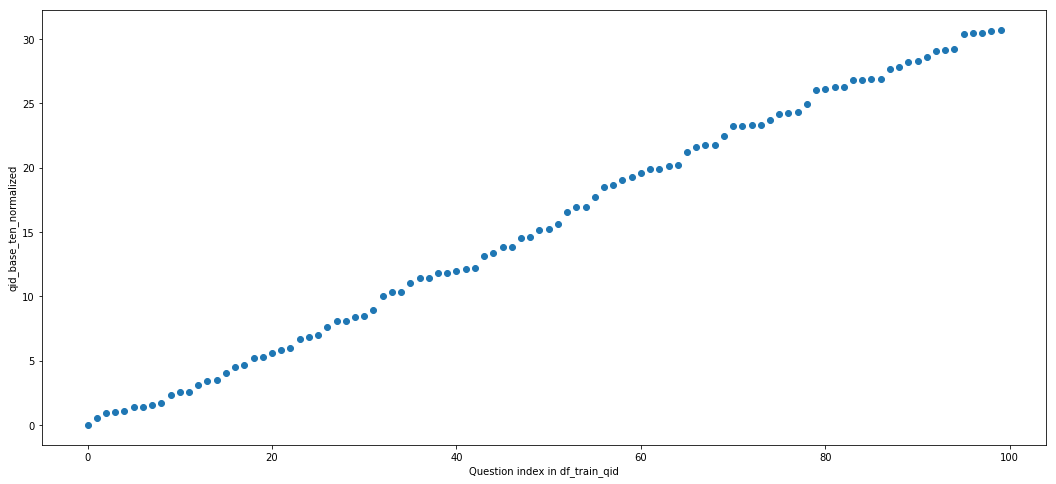

In [9]:
import matplotlib.pyplot as plt

min_qid = df_train_qid['qid_base_ten'].min()
max_qid = df_train_qid['qid_base_ten'].max()
df_train_qid['qid_base_ten_normalized'] = df_train_qid['qid_base_ten'].apply(lambda x : (x - min_qid)/min_qid)
plt.figure(figsize=(18, 8));
plt.scatter(x=df_train_qid.index[:100], y=df_train_qid['qid_base_ten_normalized'][:100]);
plt.xlabel('Question index in df_train_qid');
plt.ylabel('qid_base_ten_normalized');
plt.show()

Questions are indeed sorted by ascending question id in our train dataset.

# LaTex
## Reference: [LaTeX cannot be used in a Quora question?!]https://www.kaggle.com/sunnymarkliu/latex-cannot-be-used-in-a-quora-question)

In [ ]:
import pandas as pd

filepath_train = '../data/train.csv'
filepath_test = '../data/test.csv'


train = pd.read_csv(filepath_train)
test = pd.read_csv(filepath_test)